In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from fiber_properties import FiberImage
from matplotlib import rc, cycler
cmap = mpl.cm.get_cmap('inferno')
import os
import numpy as np

rc('figure', figsize=[3.39, 3.0])
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{siunitx}')

rc('font', size=10, family='serif', serif=['Computer Modern Roman'])
rc('axes', labelsize=10, linewidth=1, unicode_minus=True)
rc('legend', frameon=False, fontsize=10, labelspacing=0.5, numpoints=1)
rc('lines', linewidth=1)

rc('xtick', labelsize=10, direction='in', top=True)
rc('xtick.major', size=4, width=1)
rc('xtick.minor', visible=True, size=2, width=1)

rc('ytick', labelsize=10, direction='in', right=True)
rc('ytick.major', size=4, width=1)
rc('ytick.minor', visible=True, size=2, width=1)

print('Complete')


Complete


In [11]:
# Instantiate the data containers and relevant info

folder = '../data/modal_noise/rv_error/'
meth = 'full' # method
cam = 'nf' # not going to use ff

coupled_data = {'folder': folder + 'coupled_ag_new/',
                'name': 'coupled agitation',
                'angle': np.deg2rad(90-46), # original angle is 52.5, minimum at 46
                'center': {},
                'std': {}}
slow_data = {'folder': folder + 'slow_agitation/',
             'name': 'slow agitation',
             'angle': np.deg2rad(90-58), # original angle is 58, minimum at 55
             'center': {},
             'std': {}}
telescope_data = {'folder': folder + 'slow_ag_new/',
                  'name': 'simulated telescope',
                  'angle': np.deg2rad(90-111.5), # original angle is 111.5, minimum at 111.5
                  'center': {},
                  'std': {}}
led_data = {'folder': folder + 'LED/',
            'name': 'LED source',
            'angle': np.deg2rad(90-58.5), # original angle is 58.5, minimum is at 60
            'center': {},
            'std': {}}

all_data = [telescope_data, slow_data, coupled_data, led_data] # cases to plot on graph (3)

print('Complete')


Complete


In [12]:
# Populate the data
# Best run once .pkl files have been created and have .get_fiber_center and .get_fiber_centroid saved

for data in all_data:
    print('### Case: %s ###' % data['name'])
    angle = data['angle']
    
    c_x = []
    c_y = []
    for i in range(0, 300, 1):
        im_obj = FiberImage(data['folder'] + cam + '_' + str(i).zfill(3) + '_obj.pkl')
        c = im_obj.get_fiber_center(method=meth, units='microns') - im_obj.get_fiber_centroid(method=meth, units='microns')
        c_x.append(c.x)
        c_y.append(c.y)
    print('Found fiber centers')

    # Make into array
    c_x = np.array(c_x)
    c_y = np.array(c_y)
    # Compute drift
    x_median = np.median(c_x)
    y_median = np.median(c_y)
    c_x -= x_median
    c_y -= y_median

    # Calculate center using angle
    data['center']['x1'] = np.sqrt(c_x**2 + c_y**2) * np.cos(np.arctan(c_y/c_x) + (angle) + (np.pi/2)*(1 - np.sign(c_x)))
        
    # Convert center units to m/s #
    if cam is 'nf':
        print('Getting nf diameter')
        diameter = 100
    if cam is 'ff':
        print('Getting ff diameter')
        diameter = im_obj.get_fiber_diameter(method=meth, units='microns')
    data['center']['x1'] *= (3 * 10**8) / ((50000)*(diameter))

    # Make average lines #
    # 10 #
    data['center']['x10'] = []
    for i in range(0, 300, 10):
        data['center']['x10'].append(np.average(data['center']['x1'][i:i+10]))

    # 30 #
    data['center']['x30'] = []
    for i in range(0, 300, 30):
        data['center']['x30'].append(np.average(data['center']['x1'][i:i+30]))

    # Compute std #
    data['std']['x1'] = np.std(data['center']['x1'])
    data['std']['x10'] = np.std(data['center']['x10'])
    data['std']['x30'] = np.std(data['center']['x30'])
    
print('Complete')


### Case: simulated telescope ###
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decodi

decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding

decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding object
decoding

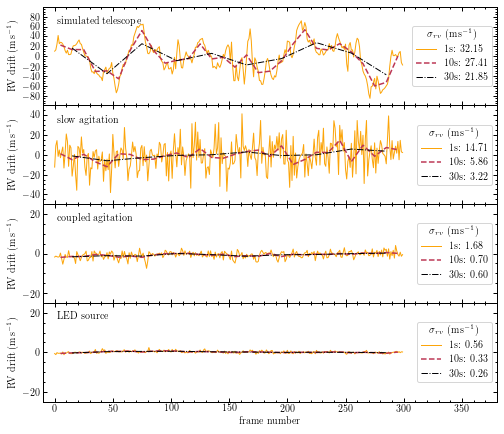

In [13]:
# Plot data
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=[7.1,6.13333333])

ax4.set_xlabel('frame number')

for data, ax in zip(all_data, [ax1, ax2, ax3, ax4]):
    # Line colors and styles #
    linecol1 = cmap(0.8)
    linecol2 = cmap(0.5)
    linecol3 = cmap(0.0)
    ls1 = '-'
    ls2 = '--'
    ls3 = '-.'

    ax.text(0.03, 0.83, data['name'], horizontalalignment='left', transform=ax.transAxes)
    center_line, = ax.plot(data['center']['x1'], color=linecol1, ls=ls1, label='1s: %.2f' % data['std']['x1'])
    avg10_line, = ax.plot(range(5, 300, 10), data['center']['x10'], color=linecol2, ls=ls2, linewidth=1.5, label='10s: %.2f' % data['std']['x10'])
    avg30_line, = ax.plot(range(15, 300, 30), data['center']['x30'], color=linecol3, ls=ls3, label='30s: %.2f' % data['std']['x30'])
    ax.legend(title='$\sigma_{rv}$ (\\SI{}{\meter\per\second})', loc='center right', frameon=True)   
    
    ax.set_ylabel('RV drift (\\SI{}{\meter\per\second})') 
    
# Set limits and ticks
ax1.set_ylim(-100, 100)
ax1.set_yticks(range(-80, 100, 20))
ax2.set_ylim(-40 * 1.25, 40 * 1.25)
ax2.set_yticks(range(-40, 60, 20))
ax3.set_ylim(-20 * 1.25, 20 * 1.25)
ax3.set_yticks(np.arange(-20, 25, 20))
ax4.set_ylim(-20 * 1.25, 20 * 1.25)
ax4.set_yticks(np.arange(-20, 25, 20))

ax1.set_xlim(-10, 380)

# Grid spacing
fig1.tight_layout()
fig1.subplots_adjust(hspace=0)

# fig1.savefig('rv_error.pdf', dpi=600)


In [14]:
# Helpful functions to extract data

def image_list(folder, cam, num=10, start=0, ext='.fit'):
    return [image_base(folder, cam, i) + ext for i in xrange(start, start+num, 1)]

def image_base(folder, cam, im):
    if folder and not folder.endswith('/'):
        folder += '/'
    return folder + cam + '_' + str(im).zfill(3)

def object_file(folder, cam, num=10, start=0):
    if folder and not folder.endswith('/'):
        folder += '/'
    front = image_base(folder, cam, start)
    back = '_obj.pkl'
    if start == 0 and not os.path.exists(image_base(folder, cam, num) + '.fit'):
        return folder + cam + back
    elif num == 1:
        return front + back
    else:
        return front + '-' + str(start+num-1).zfill(3) + back
    
print('Complete')
    

Complete


In [15]:
# Populate the long-term S/N data

cam = 'nf'

folder = 'C:/Libraries/Box Sync/ExoLab/Fiber_Characterization/Image Analysis/data/modal_noise/rv_error/'

led_data = {'folder': folder + 'LED/',
            'name': 'LED source',
            'mn': []}

coupled_data = {'folder': folder + 'coupled_ag_new/',
                'name': 'Coupled Agitation',
                'mn': []}

slow_data = {'folder': folder + 'slow_agitation/',
             'name': 'Slow Agitation',
             'mn': []}

all_data = [led_data, coupled_data, slow_data]

for data in all_data:
    folder = data['folder']
    ambient = image_list(folder + 'ambient/', cam)
    dark = image_list(folder + 'dark/', cam)
    
    print data['name']
    for i in xrange(60):
        obj_file = object_file(folder, cam, num=i+1, start=0)
        
        if os.path.exists(obj_file):
#             print 'retrieving ' + obj_file[-20:]
            im = FiberImage(obj_file)
        else:
            images = image_list(folder, cam, num=i+1, start=0)
            print 'saving ' + images[-1][-18:]
            im = FiberImage(images, ambient=ambient, dark=dark)
        mn = im.get_modal_noise(method='filter', kernel_size=51, fiber_method='full')
        data['mn'].append(mn)
        print str(mn)
        im.save_object(obj_file)

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-15-0212b63ab74e>, line 26)

In [ ]:
# Plot the long-term S/N data

markers = ['o', 's', '^', 'X', 'P']
colors = [cmap(i) for i in np.linspace(0,0.9,len(all_data))]

fig, ax = plt.subplots(1,1, figsize=[3.39, 3.0])

for (data, color, marker) in zip(all_data, colors, markers):
    ax.plot(range(1,len(data['mn'])+1), data['mn'], color=color, label=data['name'])
    
ax.set_ylim(0,100)
ax.set_xlabel('number of rotations')
ax.set_ylabel('S/N')
ax.legend(loc='upper left', ncol=1)

fig.tight_layout()

fig.savefig('long_term_snr.pdf', dpi=600)
